Виконання за першою інтерполяційною формулою : 
f(1.416) = 0.8882224592474111
f(1.456) = 0.8968518438182913
Виконання за другою інтерполяційною формулою : 
f(1.416) = 0.8882224592474111
f(1.456) = 0.8968518438182913


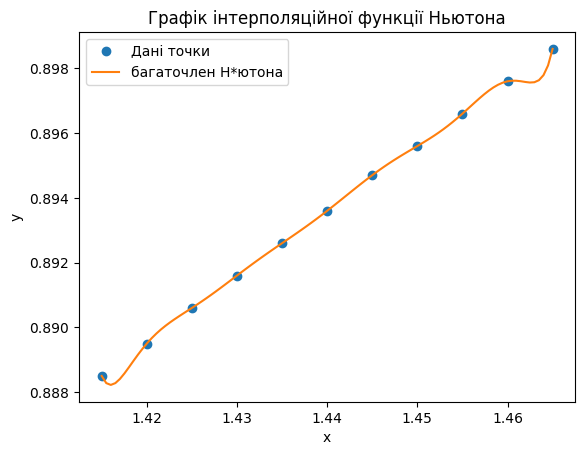

In [2]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
# задані точки
x = np.array ([1.415, 1.420, 1.425, 1.430, 1.435, 1.440, 1.445, 1.450, 1.455, 1.460, 1.465])
y = np.array([0.8885, 0.8895, 0.8906, 0.8916, 0.8926, 0.8936, 0.8947, 0.8956, 0.8966, 0.8976, 0.8986])
# перша інтерполяційна формула
def first_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
        
    return ans

# друга інтерполяційна формула
def second_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = f[0, 0]
    for j in range(1, n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

x1 = np.array([1.416,1.456])
print("Виконання за першою інтерполяційною формулою : ")
for i in x1:
    y1 = first_interpolation(x, y, i)
    print(f"f({i}) = {y1}")
print("Виконання за другою інтерполяційною формулою : ")
for i in x1:
    y2 = second_interpolation(x, y, i)
    print(f"f({i}) = {y2}")

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    yy[i] = second_interpolation(x, y, xx[i])
plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='багаточлен Н*ютона')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()